In [1]:
# forked from ./Dropbox/Workbench/Jupyter/sage.ipynb 2/8/17
from __future__ import print_function

import phcpy
from phcpy.solver import solve

# from phcpy.examples import binomials
# ex = binomials()
# N = 4
# xs = ['x'+str(i+1) for i in range(N)]
'''
# butcher's problem, http://homepages.math.uic.edu/~jan/PHCpack/node10.html 
ex = """ z*u+y*v+t*w-w**2-1/2*w-1/2;
 z*u**2+y*v**2-t*w**2+w**3+w**2-1/3*t+4/3*w;
 x*z*v-t*w**2+w**3-1/2*t*w+w**2-1/6*t+2/3*w;
 z*u**3+y*v**3+t*w**3-w**4-3/2*w**3+t*w-5/2*w**2-1/4*w-1/4;
 x*z*u*v+t*w**3-w**4+1/2*t*w**2-3/2*w**3+1/2*t*w-7/4*w**2-3/8*w-1/8;
 x*z*v**2+t*w**3-w**4+t*w**2-3/2*w**3+2/3*t*w-7/6*w**2-1/12*w-1/12;
 -t*w**3+w**4-t*w**2+3/2*w**3-1/3*t*w+13/12*w**2+7/24*w+1/24;""".splitlines()

xs = ['z', 'u', 'y', 'v', 't', 'w', 'x']
N = len(xs)
'''

# FIXME: load N, ex from standard phcpack input.

with open('linkage.txt', 'r+') as f:
    raw = f.read()
    ex = raw.split(2*os.linesep)

xs = ['X1','X2','Y1','Y2']
N = len(xs)

print( len(ex) ) # for eq in ex: print(eq)

PHCv2.4.33 released 2017-01-05 works!
4


In [2]:
from phcpy_plot import parse, plot_phcpy

raw = solve(ex) # TODO: run in background for systems with many roots
sols = parse(raw, N)

print(sols.dtype)
print(sols[0])

{'names': ['dt', 'm', 'X1', 'Y1', 'Y2', 'X2', 'err', 'rco', 'res'], 'formats': ['complex_', 'int_', 'complex_', 'complex_', 'complex_', 'complex_', 'float_', 'float_', 'float_']}
[('dt', '<c16'), ('m', '<i8'), ('X1', '<c16'), ('Y1', '<c16'), ('Y2', '<c16'), ('X2', '<c16'), ('err', '<f8'), ('rco', '<f8'), ('res', '<f8')]
(0j, 16, (2.58414528243157e-18-4.53301817477391e-18j), (-8.55691654675288e-18+9.00249779768793e-19j), (-6.10384172697094e-18-5.07371512461354e-18j), (-7.82445674473155e-18-7.94826502785941e-19j), 5.027e-16, 1.039e-17, 1.838e-34)


In [3]:
# naiively evaluating the polynomials in sage introduces slight numeric error
print(xs)
loc = dict(zip(xs, sols[xs][0]))

var(xs) # prep SAGE
'''
for line in ex:
    eq = line[:-1] # drop trailing ;
    print('{0:30} {1}'.format( eq, abs( sage_eval(eq, locals=loc)) ))
''' # FIXME: handle ** properly
;

['X1', 'X2', 'Y1', 'Y2']


''

36/59 solutions ok


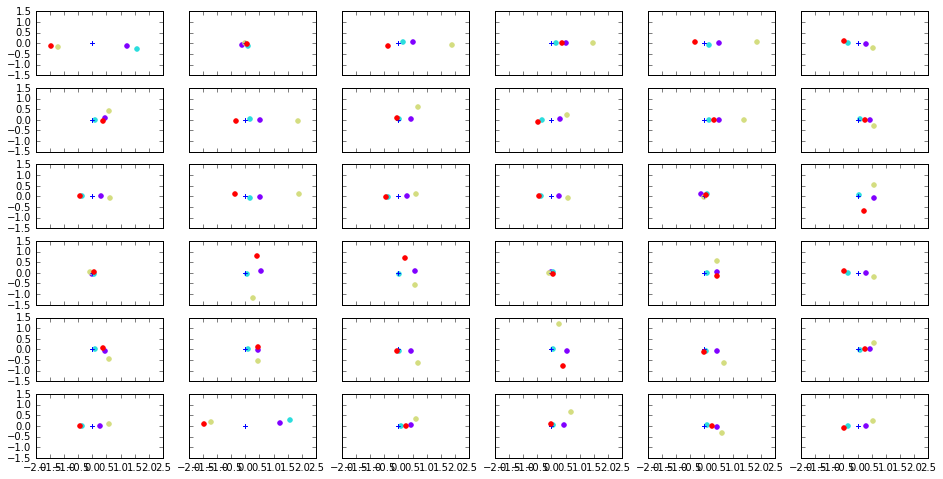

In [4]:
%matplotlib inline
plot_phcpy(sols, xs)

In [5]:
sols['rco'] # inverse condition number. TODO: filter out small.

array([  1.03900000e-17,   5.50100000e-04,   4.05300000e-03,
         7.91100000e-02,   5.49400000e-15,   2.96700000e-03,
         7.07900000e-16,   1.28200000e-01,   2.07300000e-02,
         3.35100000e-02,   1.28200000e-01,   3.39900000e-17,
         8.28700000e-03,   2.18700000e-02,   5.14200000e-13,
         3.49800000e-03,   2.29700000e-02,   2.66900000e-02,
         7.91100000e-02,   1.11200000e-16,   2.66900000e-02,
         2.70300000e-02,   7.20100000e-15,   4.04100000e-14,
         2.82400000e-17,   4.05300000e-03,   7.71200000e-13,
         2.13900000e-14,   1.62300000e-02,   4.28500000e-03,
         6.38600000e-03,   1.62300000e-02,   4.28500000e-03,
         1.02700000e-02,   2.18700000e-02,   8.97900000e-15,
         3.35100000e-02,   3.63900000e-15,   1.02700000e-02,
         6.32300000e-18,   1.00200000e-16,   4.89600000e-16,
         8.01600000e-15,   2.36100000e-17,   8.28700000e-03,
         6.38600000e-03,   1.10100000e-17,   4.41000000e-17,
         3.81400000e-14,